In [2]:
import pandas as pd
import pickle 
import numpy as np
import networkx as nx
import re
from collections import Counter
import plotly.express as px

ROOT_PATH = '/home/chiwon/workspace/vmh_workbook/mangoflavoured.github.io'
graphs = ["Colorectal", "IBD", "Obesity", "T2D", "WT2D"] #Cirrhosis: error|

In [4]:
with open(f"{ROOT_PATH}/data/mm-graph/preprocessed_T2D.pkl", "rb") as h:
    t2d_dict = pickle.load(h)
    print(t2d_dict.keys())

dict_keys(['abundance_profile', 'marker_profile', 'microbe_names', 'fold_idx_1', 'fold_idx_2', 'fold_idx_3', 'fold_idx_4', 'fold_idx_5'])


In [5]:
for key in t2d_dict.keys():
    print(type(t2d_dict[key]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'list'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


In [6]:
t2d_abundance = pd.DataFrame(t2d_dict["abundance_profile"])
t2d_marker = pd.DataFrame(t2d_dict["marker_profile"])
t2d_abundance.to_csv(f"{ROOT_PATH}/data/mm-graph/T2D_Abundance_Profile.csv")
t2d_marker.to_csv(f"{ROOT_PATH}/data/mm-graph/T2D_Marker_Profile.csv")

In [7]:
t2d_marker.shape

(344, 120001)

In [8]:
t2d_marker.head()

dataset_name,ID@subjectID,CLI@bodysite,Y@disease,CLI@age,CLI@gender,CLI@country,CLI@sequencing_technology,CLI@pubmedid,CLI@camp,CLI@paired_end_insert_size,...,X@gi|83286007|ref|XM_724880.1|,X@gi|83591340|ref|NC_007643.1|:3854287-3855165,X@gi|83956146|ref|NZ_AALZ01000014.1|:c71868-71287,X@gi|84389706|ref|NZ_AAMR01000024.1|:c62016-61705,X@gi|85057280|ref|NC_007716.1|:178414-178599,X@gi|85057280|ref|NC_007716.1|:195234-195935,X@gi|88607955|ref|NC_007798.1|:118090-119082,X@gi|88797415|ref|NZ_AAOE01000002.1|:c235147-234506,X@gi|89892746|ref|NC_007907.1|:c3938880-3937900,X@gi|94502223|ref|NZ_AANL01000001.1|:c8848-8444
ID@sampleID,,,,,,,,,,,,,,,,,,,,,
CON-001,con-001,stool,n,21,female,china,Illumina,23023125,nd,nd,...,0,0,0,0,0,0,0,0,0,0
CON-002,con-002,stool,n,53,female,china,Illumina,23023125,nd,nd,...,0,0,0,0,0,0,0,0,0,0
CON-003,con-003,stool,n,61,female,china,Illumina,23023125,nd,nd,...,0,0,0,0,0,0,0,0,0,0
CON-004,con-004,stool,n,55,female,china,Illumina,23023125,nd,nd,...,0,0,0,0,0,0,0,0,0,0
CON-005,con-005,stool,n,53,female,china,Illumina,23023125,nd,nd,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Microbe count
match = "X@gi"
c = 0
for column in t2d_marker.columns:
    if re.match(match, column):
        c += 1
    else:
        continue
print(f"NUMBER OF MICROBES: {c}")

NUMBER OF MICROBES: 119792


In [10]:
#Sequencing tech tyoes
sequencing_tech = t2d_marker["CLI@sequencing_technology"].unique().tolist()
for tech in sequencing_tech:
    print(tech)

Illumina


In [11]:
#gender distribution
gender = t2d_marker["CLI@gender"].tolist()
c = Counter(gender)
print(c)

Counter({'male': 190, 'female': 154})


In [12]:
#checking duplicates
column_list = list(t2d_marker.columns)
column_set = set(column_list)
if len(list(column_set)) == len(column_list):
    print("NO DUPLICATES")
else:
    print("DUPLICATES DETECTED")

NO DUPLICATES


In [13]:
#overall sparsity of microbes
t2d_marker_microbes = t2d_marker.filter(regex = "^X@gi")
t2d_marker_microbes = t2d_marker_microbes.astype(int)
t2d_matrix = t2d_marker_microbes.to_numpy()
print("SPARSITY: {}".format((t2d_matrix ==0).mean()))

SPARSITY: 0.8880357251018044


In [14]:
#label counts
label_count = len(t2d_marker)
label_false = t2d_marker.loc[t2d_marker["Y@disease"] == "n"]
false_count = len(label_false)
true_count = label_count - false_count

print(f"TOTAL: {label_count}\nTRUE_NEG: {false_count}\nTRUE_POS: {true_count}")

TOTAL: 344
TRUE_NEG: 174
TRUE_POS: 170


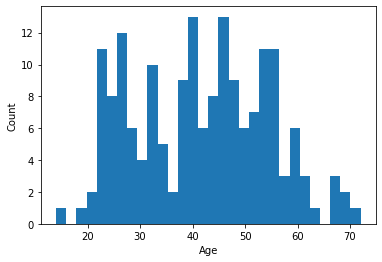

In [27]:
#age distribution
import matplotlib.pyplot as plt
#label split
t2d_marker_false = t2d_marker.loc[t2d_marker["Y@disease"] == "n"] #false as in normal
t2d_false_matrix = t2d_marker_false.filter(regex = "^X@gi").astype(int).to_numpy()
t2d_marker_true = t2d_marker.loc[t2d_marker["Y@disease"] == "t2d"] #true as in has diabetes
t2d_true_matrix = t2d_marker_true.filter(regex = "^X@gi").astype(int).to_numpy()

wt_age = t2d_marker_false["CLI@age"].astype(int).tolist()
disease_age = t2d_marker_true["CLI@age"].astype(int).tolist()

plt.hist(wt_age, 30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

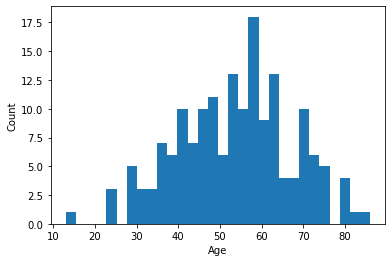

In [28]:
plt.hist(disease_age, 30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [37]:
print(disease_age)

[53, 52, 49, 61, 46, 37, 55, 51, 48, 56, 70, 52, 49, 47, 41, 58, 53, 45, 39, 70, 63, 59, 63, 51, 40, 59, 53, 75, 74, 36, 68, 39, 68, 53, 31, 36, 57, 58, 68, 42, 74, 73, 33, 65, 64, 45, 62, 72, 52, 63, 45, 73, 48, 46, 43, 44, 49, 58, 40, 58, 24, 72, 57, 71, 58, 35, 70, 58, 60, 56, 81, 55, 51, 33, 55, 86, 28, 54, 71, 50, 71, 49, 66, 60, 64, 75, 55, 32, 46, 25, 54, 54, 58, 61, 83, 54, 55, 74, 46, 43, 39, 58, 72, 57, 51, 81, 61, 49, 55, 29, 46, 55, 36, 60, 33, 71, 41, 13, 57, 80, 57, 62, 37, 49, 31, 58, 62, 41, 61, 44, 65, 79, 65, 63, 40, 59, 43, 46, 25, 60, 71, 62, 54, 51, 29, 41, 38, 35, 28, 43, 38, 30, 49, 56, 70, 68, 62, 48, 61, 53, 63, 49, 57, 71, 41, 43, 72, 39, 42, 62]


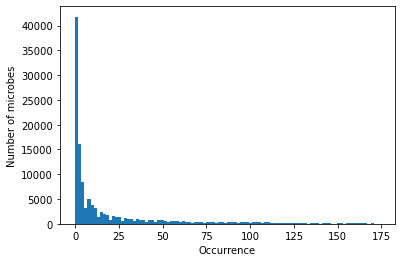

In [31]:
#bacteria abundance distribution
bacteria_count = np.count_nonzero(t2d_false_matrix, axis=0)
plt.hist(bacteria_count, 100)
plt.xlabel("Occurrence")
plt.ylabel("Number of microbes")
plt.show()

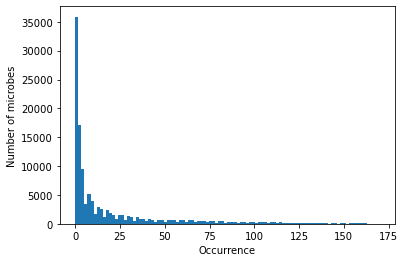

In [32]:
#bacteria abundance distribution
bacteria_count_t2d = np.count_nonzero(t2d_true_matrix, axis=0)
plt.hist(bacteria_count_t2d, 100)
plt.xlabel("Occurrence")
plt.ylabel("Number of microbes")
plt.show()

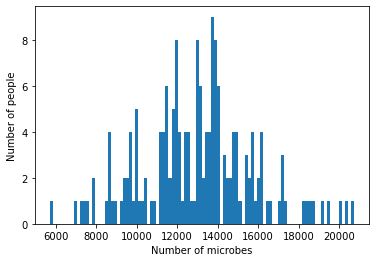

In [33]:
#Distribution of no. of bacteria in people
bacteria_per_person = np.count_nonzero(t2d_false_matrix, axis=1)
plt.hist(bacteria_per_person, 100)
plt.xlabel("Number of microbes")
plt.ylabel("Number of people")
plt.show()

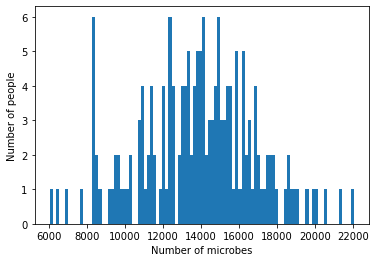

In [34]:
bacteria_per_person = np.count_nonzero(t2d_true_matrix, axis=1)
plt.hist(bacteria_per_person, 100)
plt.xlabel("Number of microbes")
plt.ylabel("Number of people")
plt.show()

In [45]:
#Microbes exclusively present on WT/Patients
#Check if there are such microbes 
matrix_list = [t2d_matrix, t2d_false_matrix, t2d_true_matrix]
for mat in matrix_list:
    print((~mat.any(axis=0)).any())

False
True
True


In [68]:
true_exclusive_microbe_idx = np.where(~t2d_false_matrix.any(axis=0))[0].tolist()
false_exclusive_microbe_idx = np.where(~t2d_true_matrix.any(axis=0))[0].tolist()

microbes_list = t2d_marker_microbes.columns.tolist()
true_exclusive_microbes = []
false_exclusive_microbes = []

for i in true_exclusive_microbe_idx:
    true_exclusive_microbes.append(microbes_list[i])
print("NUM OF TRUE EXCLUISIVE MICROBES: {}".format(len(true_exclusive_microbes)))
    
for i in false_exclusive_microbe_idx:
    false_exclusive_microbes.append(microbes_list[i])
print("NUM OF TRUE EXCLUISIVE MICROBE STRAINS: {}".format(len(true_exclusive_microbes)))
    
#check if there's overlap
a = set(true_exclusive_microbes)
b = set(false_exclusive_microbes)
if not a&b: print("NO OVERLAP")

NUM OF TRUE EXCLUISIVE MICROBES: 19531
NUM OF TRUE EXCLUISIVE MICROBE STRAINS: 19531
NO OVERLAP


In [62]:
for i in range(10):
    print(true_exclusive_microbes[i])
print("----------------------------------------------")
for i in range(10):
    print(false_exclusive_microbes[i])

X@gi|108562424|ref|NC_008086.1|:1297524-1298312
X@gi|119025018|ref|NC_008618.1|:c1768547-1766292
X@gi|120601051|ref|NC_008751.1|:3012106-3012942
X@gi|139437954|ref|NZ_AAVN02000002.1|:c102952-102281
X@gi|145297124|ref|NC_009348.1|:c3777316-3776609
X@gi|146386150|ref|NZ_AAXG02000001.1|:c44509-44321
X@gi|146386227|ref|NZ_AAYG02000011.1|:139434-139553
X@gi|146386227|ref|NZ_AAYG02000011.1|:139743-139856
X@gi|150006674|ref|NC_009615.1|:c3911175-3910225
X@gi|153883811|ref|NZ_ABDX01000024.1|:9104-9868
----------------------------------------------
X@gi|116626972|ref|NC_008532.1|:867149-868246
X@gi|119025018|ref|NC_008618.1|:1718316-1718732
X@gi|139437954|ref|NZ_AAVN02000002.1|:c333891-333082
X@gi|139439345|ref|NZ_AAVN02000008.1|:97016-97243
X@gi|139439895|ref|NZ_AAVN02000014.1|:3095-3211
X@gi|139439942|ref|NZ_AAVN02000015.1|:24369-25103
X@gi|139440029|ref|NZ_AAVN02000017.1|:7510-8175
X@gi|139440029|ref|NZ_AAVN02000017.1|:c5757-5104
X@gi|139440029|ref|NZ_AAVN02000017.1|:c9199-9107
X@gi|14638622

In [35]:
#"Useless" columns
cli_features = t2d_marker.filter(regex = "^CLI@")
print("NUMBER OF CLIENT FEATURES: {}".format(len(cli_features.columns.tolist())))
onecount = 0
useless_columns = []
for col in cli_features.columns:
    if (len(cli_features[col].unique()) == 1):
        #print(cli_features[col].unique())
        onecount +=1
        useless_columns.append(col)

print("FEATURES WITH ONLY ONE VALUE:", onecount)
#for col in useless_columns:
#    print(col)

NUMBER OF CLIENT FEATURES: 207
FEATURES WITH ONLY ONE VALUE: 190
